In [71]:
#import all libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn import svm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [72]:
#load data 
world_cup = pd.read_csv('datasets/World Cup 2019 Dataset.csv')
results = pd.read_csv('datasets/results.csv')

In [73]:
world_cup.head()

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current rank
0,England,A,11,0,3,5,1
1,South Africa,A,6,0,0,4,3
2,West Indies,A,11,2,3,4,8
3,Pakistan,A,11,1,2,6,6
4,New Zealand,A,11,0,1,7,4


In [74]:
results.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [75]:
print (results['Winner'].unique())

['Sri Lanka' 'India' 'Australia' 'New Zealand' 'no result' 'Kenya'
 'Afghanistan' 'Netherlands' 'Canada' 'South Africa' 'England' 'Zimbabwe'
 'West Indies' 'Pakistan' 'Ireland' 'Scotland' 'Bangladesh' 'tied'
 'U.A.E.' 'P.N.G.' 'Hong Kong']


In [76]:
results['Winner'].value_counts()

India           122
Australia       107
Sri Lanka        99
South Africa     94
England          92
Pakistan         87
New Zealand      74
West Indies      51
Bangladesh       50
Afghanistan      40
no result        38
Zimbabwe         35
Ireland          34
Scotland         21
tied             11
Netherlands      10
U.A.E.            8
Kenya             7
Hong Kong         6
Canada            5
P.N.G.            5
Name: Winner, dtype: int64

In [77]:
results.shape

(996, 6)

In [78]:
#Remove rows where result is 'No Result' or 'Tied' # Removes 49 (38 + 11 entries from 996)
results = results.drop(results[(results.Winner == 'no result') | (results.Winner == 'tied')].index)

In [79]:
results.shape

(947, 6)

In [80]:
df = results[(results['Team_1'] == 'India') | (results['Team_2'] == 'India')]
india = df.iloc[:]
india.head()

,date,Team_1,Team_2,Winner,Margin,Ground
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka
5,11-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
6,13-Jan-10,India,Sri Lanka,Sri Lanka,4 wickets,Dhaka


In [81]:
#creating a column for matches played in 2010
year = []
for row in india['date']:
    year.append(int(row[7:]))
india ['match_year']= year
india_2010 = india[india.match_year >= 10]
india_2010.count()

date          142
Team_1        142
Team_2        142
Winner        142
Margin        142
Ground        142
match_year    142
dtype: int64

In [82]:
#narrowing to team patcipating in the world cup
worldcup_teams = ['England', ' South Africa', '', 'West Indies', 
            'Pakistan', 'New Zealand', 'Sri Lanka', 'Afghanistan', 
            'Australia', 'Bangladesh', 'India']
df_teams_1 = results[results['Team_1'].isin(worldcup_teams)]
df_teams_2 = results[results['Team_2'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_1, df_teams_2))
df_teams.count()

date      1368
Team_1    1368
Team_2    1368
Winner    1368
Margin    1368
Ground    1368
dtype: int64

In [83]:
df_teams = df_teams.drop_duplicates()

In [84]:
df_teams.head()

,date,Team_1,Team_2,Winner,Margin,Ground
0,4-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,7 wickets,Dhaka
1,5-Jan-10,India,Sri Lanka,Sri Lanka,5 wickets,Dhaka
2,7-Jan-10,Bangladesh,India,India,6 wickets,Dhaka
3,8-Jan-10,Bangladesh,Sri Lanka,Sri Lanka,9 wickets,Dhaka
4,10-Jan-10,India,Sri Lanka,India,8 wickets,Dhaka


In [85]:
#dropping columns that wll not affect match outcomes
df_teams_2010 = df_teams.drop(['date','Margin', 'Ground'], axis=1)
df_teams_2010.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,Sri Lanka
1,India,Sri Lanka,Sri Lanka
2,Bangladesh,India,India
3,Bangladesh,Sri Lanka,Sri Lanka
4,India,Sri Lanka,India


In [86]:
#Building the model
#the prediction label: The winning_team column will show "1" Team 1 has won and "2" if the away team has won.

df_teams_2010 = df_teams_2010.reset_index(drop=True)
df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_1,'Winner']=1
df_teams_2010.loc[df_teams_2010.Winner == df_teams_2010.Team_2, 'Winner']=2
#df_teams_2010 = df_teams_2010.drop(['Winner'], axis=1)

df_teams_2010.head()

,Team_1,Team_2,Winner
0,Bangladesh,Sri Lanka,2
1,India,Sri Lanka,2
2,Bangladesh,India,2
3,Bangladesh,Sri Lanka,2
4,India,Sri Lanka,1


In [87]:
#convert team-1 and team-2 from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_2010, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Separate X and y sets
X = final.drop(['Winner'], axis=1)
y = final["Winner"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [88]:
final.head()

,Winner,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,...,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [117]:
clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
score2 = clf.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.636
Test set accuracy:  0.604


In [118]:
from sklearn import metrics
import seaborn as sn

In [119]:
y_pred = clf.predict(X_test)

In [120]:
print(X_test.shape, y_pred.shape)

(255, 35) (255,)


In [121]:
def draw_cm (actual, predicted) :
    cm = metrics.confusion_matrix (actual, predicted, [1,2])
    sn.heatmap(cm, annot = True, fmt ='.2f',
               xticklabels = ['Team 1', 'Team 2'],
               yticklabels = ['Team 1', 'Team 2'])
    plt.ylabel ('Actual Match result')
    plt.xlabel ('Predicted Match result')
    plt.show()

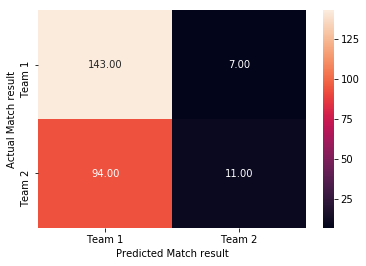

In [122]:
draw_cm(y_test, y_pred)

In [143]:
a=(141+11)/(141+11+7+94)
print(a)

0.6007905138339921


In [124]:
#adding ICC rankings
#the team which is positioned higher on the ICC Ranking will be considered "favourite" for the match
#and therefore, will be positioned under the "Team_1" column

# Loading new datasets
ranking = pd.read_csv('datasets/icc_rankings.csv') 
fixtures = pd.read_csv('datasets/fixtures.csv')

# List for storing the group stage games
pred_set = []

In [125]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Team_1'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Team_2'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:45, :]
fixtures.tail()

,Round Number,first_position,second_position,Date,Location,Team_1,Team_2,Group,Result
40,1,1.0,4.0,3/7/2019,"Riverside Ground, Chester-le-Street",England,New Zealand,Group A,NaN
41,1,10.0,8.0,4/7/2019,"Headingley, Leeds",Afghanistan,West Indies,Group A,NaN
42,1,6.0,7.0,5/7/2019,"Lord's, London",Pakistan,Bangladesh,Group A,NaN
43,1,9.0,2.0,6/7/2019,"Headingley, Leeds",Sri Lanka,India,Group A,NaN
44,1,5.0,3.0,6/7/2019,"Emirates Old Trafford, Manchester",Australia,South Africa,Group A,NaN


In [126]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'Team_1': row['Team_1'], 'Team_2': row['Team_2'], 'winning_team': None})
    else:
        pred_set.append({'Team_1': row['Team_2'], 'Team_2': row['Team_1'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set
pred_set.head()

,Team_1,Team_2,winning_team
0,England,South Africa,None
1,Pakistan,West Indies,None
2,New Zealand,Sri Lanka,None
3,Australia,Afghanistan,None
4,South Africa,Bangladesh,None


In [127]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]


pred_set = pred_set.drop(['Winner'], axis=1)
pred_set.head()

,Team_1_Afghanistan,Team_1_Australia,Team_1_Bangladesh,Team_1_Canada,Team_1_England,Team_1_India,Team_1_Ireland,Team_1_Kenya,Team_1_Netherlands,Team_1_New Zealand,...,Team_2_Kenya,Team_2_Netherlands,Team_2_New Zealand,Team_2_Pakistan,Team_2_Scotland,Team_2_South Africa,Team_2_Sri Lanka,Team_2_U.A.E.,Team_2_West Indies,Team_2_Zimbabwe
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
Winner = []
#group matches 
predictions = clf.predict(pred_set)
for i in range(fixtures.shape[0]):
    print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + backup_pred_set.iloc[i, 0])
        Winner.append(backup_pred_set.iloc[i, 0])
    else:
        print("Winner: " + backup_pred_set.iloc[i, 1])
        Winner.append(backup_pred_set.iloc[i, 1])
    print('Probability of ' + backup_pred_set.iloc[i,1] + ' winning: ', '%.3f'%(clf.predict_proba(pred_set)[i][1]))
    print('Probability of ' + backup_pred_set.iloc[i,0] + ' winning: ', '%.3f'%(clf.predict_proba(pred_set)[i][0]))       
    print("")

South Africa and England
Winner: England
Probability of South Africa winning:  0.308
Probability of England winning:  0.692

West Indies and Pakistan
Winner: Pakistan
Probability of West Indies winning:  0.308
Probability of Pakistan winning:  0.692

Sri Lanka and New Zealand
Winner: New Zealand
Probability of Sri Lanka winning:  0.308
Probability of New Zealand winning:  0.692

Afghanistan and Australia
Winner: Australia
Probability of Afghanistan winning:  0.250
Probability of Australia winning:  0.750

Bangladesh and South Africa
Winner: South Africa
Probability of Bangladesh winning:  0.234
Probability of South Africa winning:  0.766

Pakistan and England
Winner: England
Probability of Pakistan winning:  0.381
Probability of England winning:  0.619

Afghanistan and Sri Lanka
Winner: Sri Lanka
Probability of Afghanistan winning:  0.259
Probability of Sri Lanka winning:  0.741

South Africa and India
Winner: India
Probability of South Africa winning:  0.308
Probability of India winni

In [130]:
from collections import Counter
bargraph = (Counter(Winner).most_common())
print(bargraph)

[('England', 9), ('India', 8), ('South Africa', 7), ('New Zealand', 6), ('Australia', 5), ('Pakistan', 4), ('Bangladesh', 3), ('West Indies', 2), ('Sri Lanka', 1)]


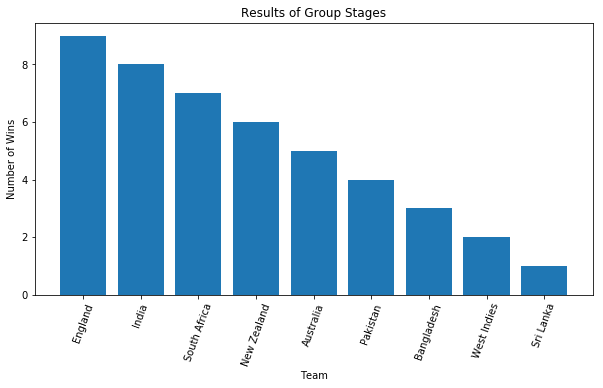

In [131]:
#increase the size of the figure
plt.figure(figsize=(10, 5))  # width:10, height:8
# Add title and axis names
plt.title('Results of Group Stages')
plt.xlabel('Team')
plt.ylabel('Number of Wins')

plt.bar(range(len(bargraph)), [val[1] for val in bargraph], align='center')
plt.xticks(range(len(bargraph)), [val[0] for val in bargraph])
plt.xticks(rotation=70)
plt.show()

In [132]:
# List of tuples before 
semi = [('India', 'South Africa'),
            ('England', 'New Zealand')]
            

In [136]:
def clean_and_predict(matches, ranking, final, clf):

    # Initialization of auxiliary list for data cleaning
    positions = []

    # Loop to retrieve each team's position according to ICC ranking
    for match in matches:
        positions.append(ranking.loc[ranking['Team'] == match[0],'Position'].iloc[0])
        positions.append(ranking.loc[ranking['Team'] == match[1],'Position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better then this team will be the 'Team_1' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'Team_1': matches[j][0], 'Team_2': matches[j][1]})
        else:
            dict1.update({'Team_1': matches[j][1], 'Team_2': matches[j][0]})

        # Append updated dictionary to the list, that will later be converted into a DataFrame
        pred_set.append(dict1)
        i += 2
        j += 1
        
        # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    # Get dummy variables and drop winning_team column
    pred_set = pd.get_dummies(pred_set, prefix=['Team_1', 'Team_2'], columns=['Team_1', 'Team_2'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    pred_set = pred_set.drop(['Winner'], axis=1)

    # Predict!
    predictions = clf.predict(pred_set)
    for i in range(len(pred_set)):
        print(backup_pred_set.iloc[i, 1] + " and " + backup_pred_set.iloc[i, 0])
        if predictions[i] == 1:
            print("Winner: " + backup_pred_set.iloc[i, 0])
        else:
            print("Winner: " + backup_pred_set.iloc[i, 1])
        print('Probability of ' + backup_pred_set.iloc[i,1] + ' winning: ', '%.3f'%(clf.predict_proba(pred_set)[i][1]))
        print('Probability of ' + backup_pred_set.iloc[i,0] + ' winning: ', '%.3f'%(clf.predict_proba(pred_set)[i][0]))  
        print("")

In [137]:
clean_and_predict(semi, ranking, final, clf)

South Africa and India
Winner: India
Probability of South Africa winning:  0.308
Probability of India winning:  0.692

New Zealand and England
Winner: England
Probability of New Zealand winning:  0.308
Probability of England winning:  0.692



In [141]:
# Finals
finals = [('England', 'India')]

In [142]:
clean_and_predict(finals, ranking, final, clf)

India and England
Winner: England
Probability of India winning:  0.441
Probability of England winning:  0.559

